In [6]:
import numpy as np
import pandas as pd

In [7]:
pwd

'C:\\Users\\gsnav\\Brainwaves'

In [8]:
df = pd.read_csv(r'C:\Users\gsnav\data\emotions.csv')
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [17]:
print(df["label"])

0       0
1       1
2       2
3       2
4       1
       ..
2127    1
2128    2
2129    0
2130    0
2131    1
Name: label, Length: 2132, dtype: int32


In [20]:
import warnings
from warnings import filterwarnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '0'), Text(2, 0, '2')])

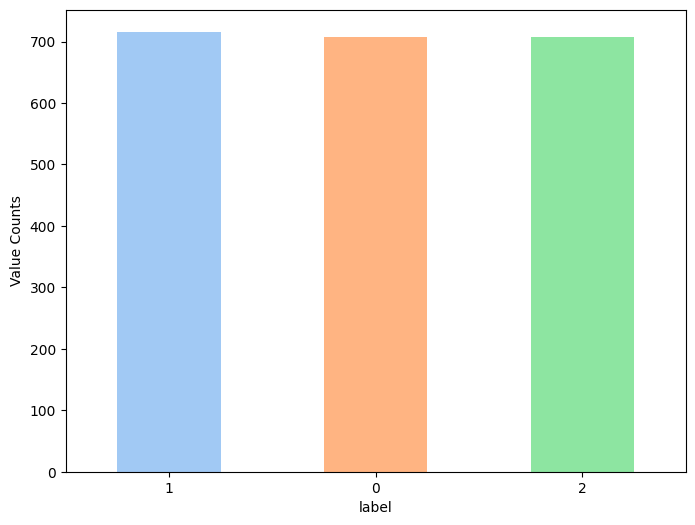

In [21]:
palette = sns.color_palette("pastel")
plt.figure(figsize=(8, 6))
bars = df["label"].value_counts().plot(kind='bar', color=palette)
plt.ylabel('Value Counts')
plt.xticks(rotation=0)

In [22]:
scaler = StandardScaler()
df_2 = df.drop(["label"], axis=1)
X = pd.DataFrame(scaler.fit_transform(df_2))

In [23]:
# Encode the labels
label_e = LabelEncoder()
df['label'] = label_e.fit_transform(df['label'])

# Split the data into training and testing sets
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=48)

# Suppress warnings
filterwarnings('ignore')

# Define and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
# Evaluate the model
accuracy = log_reg.score(X_test, y_test)
print(f"Accuracy for Logistic Regression model: {accuracy}")

Accuracy for Logistic Regression model: 0.959375


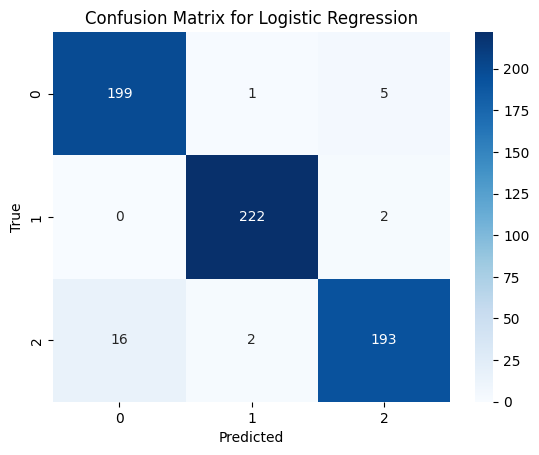

In [25]:
y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [15]:
clr = classification_report(y_test, y_pred, target_names=["Neutral", "Positive", "Negative"])
print(" Classification Report ".center(60, "*"))
print(clr)

****************** Classification Report *******************
              precision    recall  f1-score   support

     Neutral       0.93      0.97      0.95       205
    Positive       0.99      0.99      0.99       224
    Negative       0.96      0.91      0.94       211

    accuracy                           0.96       640
   macro avg       0.96      0.96      0.96       640
weighted avg       0.96      0.96      0.96       640

